In [11]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import statsmodels.formula.api as smf                # logistic regression
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
import gender_guesser.detector as gender # guess gender based on (given) name
import numpy as np

# loading data and data dictionary
file = "./GOT_character_predictions.xlsx"

got = pd.read_excel(io=file)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

file2= "./GOT_data_dictionary.xlsx"

got_dic = pd.read_excel(io=file2)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got_dic

,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measurement unknown)
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house (i.e. a powerful family)
9,spouse,Character's spouse(s)


In [12]:
got.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [13]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df

#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [14]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [15]:
got.info()
got.describe(include='number').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

,S.No,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1946.00,433.00,1946.0,1946.00,1946.00,1946.00,1946.00,21.00,26.00,23.00,276.00,1946.00,1946.00,433.00,1946.00,1946.00,1946.00
mean,973.50,1577.36,0.2,0.37,0.48,0.59,0.40,0.71,0.19,0.65,0.78,0.14,0.46,-1293.56,0.31,0.09,0.75
std,561.91,19565.41,0.4,0.48,0.50,0.49,0.49,0.46,0.40,0.49,0.42,0.35,0.50,19564.34,1.38,0.16,0.44
min,1.00,-28.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00,0.00
25%,487.25,240.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,18.00,0.00,0.01,0.00
50%,973.50,268.00,0.0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,27.00,0.00,0.03,1.00
75%,1459.75,285.00,0.0,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,50.00,0.00,0.09,1.00
max,1946.00,298299.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,15.00,1.00,1.00


# CATEGORIZING USEFUL FEATURES NEEDED FOR ANALYSIS 

NOMINAL
------------------------------
S.No #this will be dropped 

name

culture

title

mother 

father

heir

house

spouse


INTERVAL/COUNT
-------------------------------
popularity

book1_A_Game_Of_Thrones 

book2_A_Clash_Of_Kings  

book3_A_Storm_Of_Swords  

book4_A_Feast_For_Crows   

book5_A_Dance_with_Dragons 

isAliveMother   

isAliveFather    

isAliveHeir     

isAliveSpouse  

isMarried   

isNoble

isAlive

CONTINUOUS
-------------------------------
age

numDeadRelations

dateOfBirth



FURTHER CLASSIFICATIONS
-------------------------------
-------------------------------


String Features #(Will be converted to int)
-------------------------------
name

culture

title

mother 

father

heir

house

spouse



Nominal Missing Features
-------------------------------
title

mother 

father

heir

house

spouse

culture


Continuous Missing Features
-------------------------------

dateOfBirth

age


Interval Missing Features
-------------------------------
isAliveMother    

isAliveFather    

isAliveHeir     

isAliveSpouse 


In [16]:
got.isnull().astype(int).sum(axis=0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [17]:
# analyzing features for missing value imputation and categorical encoding
#title                         : input unknown
#culture                       : input unknown
#dateOfBirth                   : input median
#mother                        : input unknown
#father                        : input unknown
#heir                          : input unknown
#house                         : input unknown
#spouse                        : input unknown
#isAliveMother                 : input 0
#isAliveFather                 : input 0
#isAliveHeir                   : input 0
#isAliveSpouse                 : input 0
#age                           : input median

In [18]:
mv_flagger(got) 
# to flag for missing variables and create features

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,Luwin,NaN,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171,0,1,0,1,1,1,1,0,1,1,1,1,1,1
1942,1943,Reek,NaN,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990,0,1,1,1,1,1,1,0,1,1,1,1,1,1
1943,1944,Symeon Star-Eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1944,1945,Coldhands,NaN,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.130435,1,1,1,1,1,1,1,0,1,1,1,1,1,1


In [19]:
#Gender guesser to guess sex and engineer features

#%pip install gender_guesser

In [20]:
#splitting name to use for gender guesser

# placeholder list
placeholder_lst1 = []

# looping over each character name
for index, col in got.iterrows():
     
    # splitting email domain at ' ' (space)
    split_name = got.loc[index, 'name'].split(sep = ' ',
                                             maxsplit= 1)
    
    # appending placeholder_lst with the results
    placeholder_lst1.append(split_name)
    

# converting placeholder_lst into a DataFrame 
got_df = pd.DataFrame(placeholder_lst1)


# displaying the results

got_df

,0,1
0,Viserys,II Targaryen
1,Walder,Frey
2,Addison,Hill
3,Aemma,Arryn
4,Sylva,Santagar
...,...,...
1941,Luwin,None
1942,Reek,None
1943,Symeon,Star-Eyes
1944,Coldhands,None


In [21]:
got_df= got_df.rename(columns={0: "first_name", 1: "other_name"})

In [22]:
got= pd.concat([got,got_df],axis=1)

In [23]:
got

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,first_name,other_name
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,Viserys,II Targaryen
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Walder,Frey
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,Addison,Hill
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,Aemma,Arryn
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Sylva,Santagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,Luwin,NaN,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171,0,1,0,1,1,1,1,0,1,1,1,1,1,1,Luwin,None
1942,1943,Reek,NaN,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990,0,1,1,1,1,1,1,0,1,1,1,1,1,1,Reek,None
1943,1944,Symeon Star-Eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Symeon,Star-Eyes
1944,1945,Coldhands,NaN,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.130435,1,1,1,1,1,1,1,0,1,1,1,1,1,1,Coldhands,None


In [24]:
# guessing gender based on (given) name

# placeholder list
placeholder_lst = []


# looping to guess gender
for name in got['first_name']:
    guess = gender.Detector().get_gender(name)
    print(guess)
    placeholder_lst.append(guess)


# converting list into a series
got['gender_guess'] = pd.Series(placeholder_lst)


# checking results
got.head(n = 5)

unknown
unknown
andy
unknown
female
unknown
unknown
unknown
male
male
mostly_male
mostly_male
mostly_male
mostly_male
mostly_male
mostly_male
unknown
male
unknown
unknown
male
male
female
unknown
unknown
female
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
mostly_female
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
unknown
male
male
andy
andy
unknown
andy
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
male
male
unknown
male
male
male
male
male
male
male
mostly_male
male
mostly_male
mostly_male
unknown
unknown
unknown
male
unknown
male
unknown
male
unknown
male
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
mostly_male
unknown
unknown
male


unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
male
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
female
unknown
male
male
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
male
male
male
male
male
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
female
male
unknown
unknown
unknown
unknown
unknown
unknown
male
male
female
unknown
female
male
unknown
unknown
unknown
unknown
unknown
unknown
male
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
male
unknown
unknown
male
unknown
female
unknown
unknown
unknown
mostly_male
male
unknown
unknown
male
male
male
unknown
female
unknown
unknown
unknown
unknown
female
unknown
female
female
female
male
male
unknown
unknown
unknown
male
male
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,first_name,other_name,gender_guess
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,Viserys,II Targaryen,unknown
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Walder,Frey,unknown
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,Addison,Hill,andy
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,Aemma,Arryn,unknown
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Sylva,Santagar,female


In [25]:
# looping to find female, male and unknown and creating features
got['is_female'] = 0
got['is_male'] = 0
got['unknown_gender'] = 0

# looping to find female, male, unknown, and andy
for index, val in got.iterrows():
    
    # checking for female or mostly female
    if 'female' in got.loc[ index , 'gender_guess'] or 'mostly_female' in got.loc[ index , 'gender_guess']:
        got.loc[index, 'is_female'] = 1
        
    # checking for andy, male and mostly male
    elif 'andy' in got.loc[ index , 'gender_guess'] or 'male' in got.loc[index, 'gender_guess'] or 'mostly_male' in got.loc[ index , 'gender_guess'] :
        got.loc[index, 'is_male'] = 1
        
 
    elif 'unknown' in got.loc[ index , 'gender_guess']:
        got.loc[index, 'unknown_gender'] = 1

In [26]:
mv_flagger(got) 
# running to check if  split cloumns have generated missing values

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,first_name,other_name,gender_guess,is_female,is_male,unknown_gender,m_other_name
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,Viserys,II Targaryen,unknown,0,0,1,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Walder,Frey,unknown,0,0,1,0
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,Addison,Hill,andy,0,1,0,0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,Aemma,Arryn,unknown,0,0,1,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Sylva,Santagar,female,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,Luwin,NaN,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171,0,1,0,1,1,1,1,0,1,1,1,1,1,1,Luwin,None,unknown,0,0,1,1
1942,1943,Reek,NaN,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990,0,1,1,1,1,1,1,0,1,1,1,1,1,1,Reek,None,unknown,0,0,1,1
1943,1944,Symeon Star-Eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Symeon,Star-Eyes,male,0,1,0,0
1944,1945,Coldhands,NaN,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.130435,1,1,1,1,1,1,1,0,1,1,1,1,1,1,Coldhands,None,unknown,0,0,1,1


In [27]:
got.isnull().astype(int).sum(axis=0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
m_title                          0
m_culture                        0
m_dateOfBirth                    0
m_mother            

In [28]:
#inputting missing values for missing nominal features
got['house']      = got['house'].fillna('unknown')
got['title']      = got['title'].fillna('unknown')
got['mother']     = got['mother'].fillna('unknown') 
got['father']     = got['father'].fillna('unknown')
got['heir']       = got['heir'].fillna('unknown')
got['house']      = got['house'].fillna('unknown')
got['spouse']     = got['spouse'].fillna('unknown')
got['culture']    = got['culture'].fillna('unknown')
got['other_name'] = got['other_name'].fillna('unknown') #to cover for newly discovered missing values from name split

fill = 0

#inputting missing values for missing interval features
got['isAliveMother'] = got['isAliveMother'].fillna(fill)
got['isAliveFather'] = got['isAliveFather'].fillna(fill)                 
got['isAliveHeir']   = got['isAliveHeir'].fillna(fill)                  
got['isAliveSpouse'] = got['isAliveSpouse'].fillna(fill)


In [29]:
dob_median = got['dateOfBirth'].median()
age_median = got['age'].median()
#inputting missing values for missing continous features

got['dateOfBirth'] = got['dateOfBirth'].fillna(dob_median)
got['age']         = got['age'].fillna(age_median)

#checking results

got.isnull().sum(axis=0)

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
m_title                       0
m_culture                     0
m_dateOfBirth                 0
m_mother                      0
m_father                      0
m_heir                        0
m_house 

In [30]:
#creating features for title
got['has_title'] = 1

# looping to find unknown
for index, val in got.iterrows():
    if 'unknown' in got.loc[index , 'title']:
        got.loc[index, 'has_title'] = 0
        
#deiplayig value count for has_title
got['has_title'].value_counts(normalize = False,
                              sort      = False,
                              ascending = False)

0    1008
1     938
Name: has_title, dtype: int64

In [31]:
got['has_house'] = 1
# looping to find unknown
for index, val in got.iterrows():
    if 'unknown' in got.loc[index , 'house']:
        got.loc[index, 'has_house'] = 0
got['has_mother'] = 1
# looping to find unknown
for index, val in got.iterrows():
    if 'unknown' in got.loc[index , 'mother']:
        got.loc[index, 'has_mother'] = 0
got['has_father'] = 1
# looping to find unknown
for index, val in got.iterrows():
    if 'unknown' in got.loc[index , 'father']:
        got.loc[index, 'has_father'] = 0
got['has_heir'] = 1
# looping to find unknown
for index, val in got.iterrows():
    if 'unknown' in got.loc[index , 'heir']:
        got.loc[index, 'has_heir'] = 0
got['has_spouse'] = 1
# looping to find unknown
for index, val in got.iterrows():
    if 'unknown' in got.loc[index , 'spouse']:
        got.loc[index, 'has_spouse'] = 0
got['has_culture'] = 1
# looping to find unknown
for index, val in got.iterrows():
    if 'unknown' in got.loc[index , 'culture']:
        got.loc[index, 'has_culture'] = 0
got['has_first_name'] = 1
# looping to find unknown
for index, val in got.iterrows():
    if 'unknown' in got.loc[index , 'first_name']:
        got.loc[index, 'has_first_name'] = 0
got['has_other_name'] = 1
# looping to find unknown
for index, val in got.iterrows():
    if 'unknown' in got.loc[index , 'other_name']:
        got.loc[index, 'has_other_name'] = 0

In [32]:
got['DobXAge']= got['dateOfBirth']+ got['age']

In [33]:
text_split_feature(col = 'name',
                   df  = got)


# checking results
got['number_of_names'].value_counts(normalize = False,
                                        sort      = False,
                                        ascending = False).sort_index()

1     591
2    1201
3      98
4       9
5      35
6      12
Name: number_of_names, dtype: int64

In [34]:
got.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,first_name,other_name,gender_guess,is_female,is_male,unknown_gender,m_other_name,has_title,has_house,has_mother,has_father,has_heir,has_spouse,has_culture,has_first_name,has_other_name,DobXAge,number_of_names
0,1,Viserys II Targaryen,unknown,unknown,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown,unknown,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,27.0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,Viserys,II Targaryen,unknown,0,0,1,0,0,0,1,1,1,0,0,1,1,295.0,3
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown,unknown,unknown,House Frey,Perra Royce,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Walder,Frey,unknown,0,0,1,0,1,1,0,0,0,1,1,1,1,305.0,2
2,3,Addison Hill,Ser,unknown,268.0,unknown,unknown,unknown,House Swyft,unknown,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,27.0,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,Addison,Hill,andy,0,1,0,0,1,1,0,0,0,0,0,1,1,295.0,2
3,4,Aemma Arryn,Queen,unknown,82.0,unknown,unknown,unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,Aemma,Arryn,unknown,0,0,1,0,1,1,0,0,0,1,0,1,1,105.0,2
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unknown,unknown,unknown,House Santagar,Eldon Estermont,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Sylva,Santagar,female,1,0,0,0,1,1,0,0,0,1,1,1,1,305.0,2


In [35]:
got_corr = got.corr().round(2)

got_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
DobXAge                       0.31
book4_A_Feast_For_Crows       0.27
m_dateOfBirth                 0.15
m_age                         0.15
m_isAliveMother               0.14
m_mother                      0.14
m_father                      0.14
m_isAliveFather               0.14
m_isAliveHeir                 0.13
m_heir                        0.13
m_spouse                      0.05
age                           0.05
m_isAliveSpouse               0.05
is_female                     0.05
m_culture                     0.04
m_house                       0.04
m_title                       0.04
m_other_name                  0.03
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
is_male                      -0.00
isAliveSpouse                -0.01
has_other_name               -0.03
unknown_gender               -0.03
has_house                    -0.04
isAliveFather                -0.04
isNoble                      -0.04
has_culture         

In [36]:
got_clean= got.drop(['S.No', 'name', 'title', 'culture',
                    'mother', 'father', 'heir', 'house',
                    'spouse','first_name','other_name',
                    'gender_guess','has_first_name','has_other_name',
                    'dateOfBirth','age'], axis = 1)
                    

got_clean

,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,is_female,is_male,unknown_gender,m_other_name,has_title,has_house,has_mother,has_father,has_heir,has_spouse,has_culture,DobXAge,number_of_names
0,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1,1,0,0,295.0,3
1,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,305.0,2
2,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,295.0,2
3,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,0,105.0,2
4,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,1,1,305.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1,1,1,1,1,0.0,0.0,0.0,0.0,0,0,0,0.351171,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,0,1,295.0,1
1942,0,1,0,1,1,0.0,0.0,0.0,0.0,0,0,0,0.096990,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,0,0,295.0,1
1943,1,1,1,1,1,0.0,0.0,0.0,0.0,0,0,0,0.030100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,295.0,2
1944,0,0,1,1,1,0.0,0.0,0.0,0.0,0,0,0,0.130435,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,0,0,295.0,1


In [37]:
dtypes = {'isAliveMother'   : int,
          "isAliveFather"   : int,
          'isAliveHeir'     : int,
          'isAliveSpouse'   : int,
          'DobXAge'         : int}

got_clean = got_clean.astype(dtypes)

In [38]:
got_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   book1_A_Game_Of_Thrones     1946 non-null   int64  
 1   book2_A_Clash_Of_Kings      1946 non-null   int64  
 2   book3_A_Storm_Of_Swords     1946 non-null   int64  
 3   book4_A_Feast_For_Crows     1946 non-null   int64  
 4   book5_A_Dance_with_Dragons  1946 non-null   int64  
 5   isAliveMother               1946 non-null   int32  
 6   isAliveFather               1946 non-null   int32  
 7   isAliveHeir                 1946 non-null   int32  
 8   isAliveSpouse               1946 non-null   int32  
 9   isMarried                   1946 non-null   int64  
 10  isNoble                     1946 non-null   int64  
 11  numDeadRelations            1946 non-null   int64  
 12  popularity                  1946 non-null   float64
 13  isAlive                     1946 

In [39]:
got_clean.head(n=5)

,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,is_female,is_male,unknown_gender,m_other_name,has_title,has_house,has_mother,has_father,has_heir,has_spouse,has_culture,DobXAge,number_of_names
0,0,0,0,0,0,1,0,0,0,0,0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1,1,0,0,295,3
1,1,1,1,1,1,0,0,0,1,1,1,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,305,2
2,0,0,0,1,0,0,0,0,0,0,1,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,295,2
3,0,0,0,0,0,0,0,0,0,1,1,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,0,105,2
4,0,0,0,1,0,0,0,0,1,1,1,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,1,1,305,2


In [40]:
got_clean.isnull().sum()

book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
numDeadRelations              0
popularity                    0
isAlive                       0
m_title                       0
m_culture                     0
m_dateOfBirth                 0
m_mother                      0
m_father                      0
m_heir                        0
m_house                       0
m_spouse                      0
m_isAliveMother               0
m_isAliveFather               0
m_isAliveHeir                 0
m_isAliveSpouse               0
m_age                         0
is_female                     0
is_male                       0
unknown_gender                0
m_other_name                  0
has_titl

In [41]:
df_corr = got_clean.corr().round(2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
DobXAge                       0.31
book4_A_Feast_For_Crows       0.27
m_dateOfBirth                 0.15
m_age                         0.15
m_isAliveFather               0.14
m_isAliveMother               0.14
m_father                      0.14
m_mother                      0.14
m_isAliveHeir                 0.13
m_heir                        0.13
is_female                     0.05
m_isAliveSpouse               0.05
m_spouse                      0.05
m_culture                     0.04
m_house                       0.04
m_title                       0.04
book5_A_Dance_with_Dragons    0.03
m_other_name                  0.03
book3_A_Storm_Of_Swords       0.01
is_male                      -0.00
isAliveSpouse                -0.01
unknown_gender               -0.03
has_house                    -0.04
has_culture                  -0.04
isNoble                      -0.04
isAliveFather                -0.04
has_title                    -0.04
has_spouse          

In [42]:
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [43]:
# declaring explanatory variables
got_data = got_clean.drop('isAlive', axis = 1)


# declaring response variable
got_target = got_clean.loc[ : , 'isAlive']

In [44]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [45]:
#to check if distribution of values is done properly
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [46]:
for val in got_clean:
    print(f" {val} + ")

 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 numDeadRelations + 
 popularity + 
 isAlive + 
 m_title + 
 m_culture + 
 m_dateOfBirth + 
 m_mother + 
 m_father + 
 m_heir + 
 m_house + 
 m_spouse + 
 m_isAliveMother + 
 m_isAliveFather + 
 m_isAliveHeir + 
 m_isAliveSpouse + 
 m_age + 
 is_female + 
 is_male + 
 unknown_gender + 
 m_other_name + 
 has_title + 
 has_house + 
 has_mother + 
 has_father + 
 has_heir + 
 has_spouse + 
 has_culture + 
 DobXAge + 
 number_of_names + 


In [47]:
# instantiating a logistic regression model object (this was repeated until good p values were obtained)
logistic_small = smf.logit(formula = """isAlive ~DobXAge +                                                 
                                                 book4_A_Feast_For_Crows +
                                                 book1_A_Game_Of_Thrones + 
                                                 book2_A_Clash_Of_Kings + 
                                                 book3_A_Storm_Of_Swords +                                                   
                                                 has_house +  
                                                 popularity 
                                                 """,
                           data    = got_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.436395
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.230     
Dependent Variable:    isAlive             AIC:                 1544.2545 
Date:                  2021-12-05 21:12    BIC:                 1587.9981 
No. Observations:      1751                Log-Likelihood:      -764.13   
Df Model:              7                   LL-Null:             -992.53   
Df Residuals:          1743                LLR p-value:         1.5281e-94
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -62.6348   8.0617 -7.7695 0.0000 -78.4353 -46.8342
DobXAge                   0.2170   0.0274  7.9225 0.0000   0.1633   0.2707
book4_A_Feast_For_Crows   1.4234   0.1514  9.4002 0.0000   1.1267   1.7202
book1_A_Game_Of_Thrones  -0.6013   0.1609 -3.7373 0.0002  -0.9167  -0.2860
book2_A_Clash_Of_Kings   -0.6049   0.1458 -4.1484 0.0000  -0.8907  -0.3191
book3_A_Storm_Of_Swords  -0.4742   0.1513 -3.1334 0.0017  -0.7708  -0.1776
has_house                -0.2686   0.1590 -1.6899 0.0911  -0.5802   0.0429
popularity               -2.7862   0.3938 -7.0746 0.0000  -3.5581  -2.0143
==========================================================================

"""

In [48]:
candidate_dict = {

 # full model
 'logit_full'   : ['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords',
                   'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother',
                   'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried',
                   'number_of_names', 'isNoble', 'DobXAge', 'numDeadRelations',
                   'popularity','isAlive','m_title', 'm_culture', 'm_dateOfBirth',
                   'm_mother','m_father','m_heir','m_house','m_spouse','m_isAliveMother',
                   'm_isAliveFather','m_isAliveHeir','m_isAliveSpouse','m_age','is_female',
                   'is_male','unknown_gender','m_other_name','has_title','has_house',
                    'has_mother','has_father','has_heir','has_spouse','has_culture'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['DobXAge','book4_A_Feast_For_Crows',
                 'book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                 'book3_A_Storm_Of_Swords','has_house',
                  'popularity'],


 # significant variables only (set 2)
 'logit_sig_2'  : ['DobXAge','book4_A_Feast_For_Crows',
                'book1_A_Game_Of_Thrones','book3_A_Storm_Of_Swords',
                'has_house','popularity','m_dateOfBirth']
    
}

 

In [49]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'number_of_names', 'isNoble', 'DobXAge', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', 'is_female', 'is_male', 'unknown_gender', 'm_other_name', 'has_title', 'has_house', 'has_mother', 'has_father', 'has_heir', 'has_spouse', 'has_culture']


First Significant p-value Model:
--------------------------------
['DobXAge', 'book4_A_Feast_For_Crows', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'has_house', 'popularity']


Second Significant p-value Model:


LOGISTIC

In [50]:
# train/test split with the full model
got_data   =  got_clean.loc[ : , candidate_dict['logit_sig_2']]
got_target =  got_clean.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7881
LogReg Testing  ACCURACY: 0.8462
LogReg Train-Test Gap   : 0.0581


C:\Users\ikech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 23  27]
 [  3 142]]


In [52]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 23
False Positives: 27
False Negatives: 3
True Positives : 142



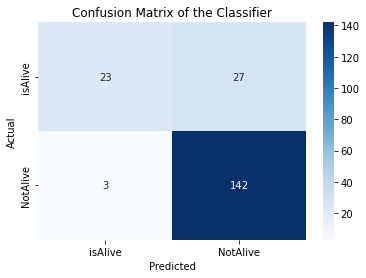

In [53]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['isAlive', 'NotAlive'])

In [54]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.7197


In [55]:
# zipping each feature name to its coefficient
logreg_model_values = zip(got[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -17.92)
('DobXAge', 0.06)
('book4_A_Feast_For_Crows', 1.41)
('book1_A_Game_Of_Thrones', -0.93)
('book2_A_Clash_Of_Kings', -0.9)
('book3_A_Storm_Of_Swords', 0.02)
('has_house', -1.7)
('popularity', 0.07)


In [56]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [57]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8995
Full Tree Testing ACCURACY : 0.8564
Full Tree AUC Score: 0.8117


In [58]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 36
False Positives: 14
False Negatives: 14
True Positives : 131



In [59]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.8412
Testing  ACCURACY: 0.8974
AUC Score        : 0.8262


In [60]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 4
True Positives : 141



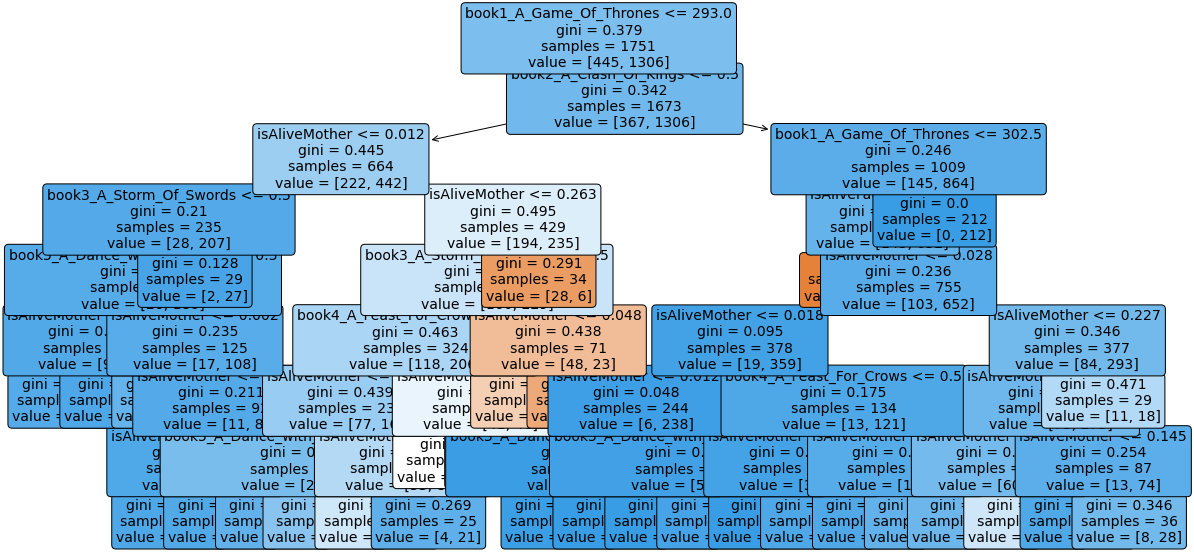

In [61]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = got_clean.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

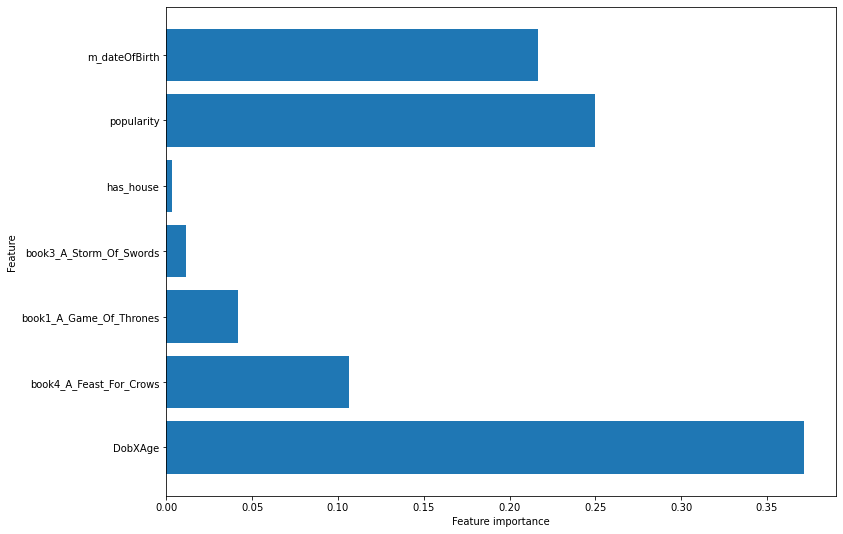

In [69]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [70]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.7197         (23, 27, 3, 142)
Full Tree     0.8117           (36, 14, 14, 131)
Pruned Tree   0.8262         (34, 16, 4, 141)



In [71]:
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7197,0.7881,0.8462,"(23, 27, 3, 142)"
1,Full Tree,0.8117,0.8995,0.8564,"(36, 14, 14, 131)"
2,Pruned Tree,0.8262,0.8412,0.8974,"(34, 16, 4, 141)"


In [72]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [73]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7881
Testing  ACCURACY: 0.8462
AUC Score        : 0.7197


C:\Users\ikech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer 

In [75]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
#C_range          = np.arange(0.1, 5.0, 0.1)
#warm_start_range = [True, False]
#solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
#param_grid = {'C'          : C_range,
              #'warm_start' : warm_start_range,
              #'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
#lr_tuned = LogisticRegression(random_state = 219,
                              #max_iter     = 1000) # increased for convergence


# GridSearchCV object
#lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 #param_distributions = param_grid, # parameters to tune
                                 #cv                  = 3,          # how many folds in cross-validation
                                 #n_iter              = 250,        # number of combinations of hyperparameters to try
                                 #random_state        = 219,        # starting point for random sequence
                                 #scoring = make_scorer(
                                           #roc_auc_score,
                                           #needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#lr_tuned_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", lr_tuned_cv.best_params_)
#print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [76]:
# checking the results of RandomizedSearch CV
#lr_tuned_cv.cv_results_

In [77]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 4.1,
                              warm_start   = True,
                              solver       = 'lbfgs',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(got_data, got_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.8372
LR Tuned Testing  ACCURACY: 0.8974
LR Tuned AUC Score        : 0.8066


In [78]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 31
False Positives: 19
False Negatives: 1
True Positives : 144



In [79]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7197,0.7881,0.8462,"(23, 27, 3, 142)"
1,Full Tree,0.8117,0.8995,0.8564,"(36, 14, 14, 131)"
2,Pruned Tree,0.8262,0.8412,0.8974,"(34, 16, 4, 141)"
3,Tuned LR,0.8066,0.8372,0.8974,"(31, 19, 1, 144)"


In [80]:
# declaring a hyperparameter space
#criterion_range = ['gini', 'entropy']
#splitter_range  = ['best', 'random']
#depth_range     = np.arange(1, 25, 1)
#leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
#param_grid = {'criterion'        : criterion_range,
              #'splitter'         : splitter_range,
              #'max_depth'        : depth_range,
              #'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
#tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
#tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                  # param_distributions   = param_grid,
                                  # cv                    = 3,
                                  # n_iter                = 1000,
                                  # random_state          = 219,
                                   #scoring = make_scorer(roc_auc_score,
                                            # needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_tree_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_tree_cv.best_params_)
#print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [81]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'best',
                                    min_samples_leaf = 15,
                                    max_depth        = 23,
                                    criterion        = 'entropy',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.8555
Testing  ACCURACY: 0.9231
AUC Score        : 0.8631


In [82]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 37
False Positives: 13
False Negatives: 2
True Positives : 143



In [83]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7197,0.7881,0.8462,"(23, 27, 3, 142)"
1,Full Tree,0.8117,0.8995,0.8564,"(36, 14, 14, 131)"
2,Pruned Tree,0.8262,0.8412,0.8974,"(34, 16, 4, 141)"
3,Tuned LR,0.8066,0.8372,0.8974,"(31, 19, 1, 144)"
4,Tuned Tree,0.8631,0.8555,0.9231,"(37, 13, 2, 143)"


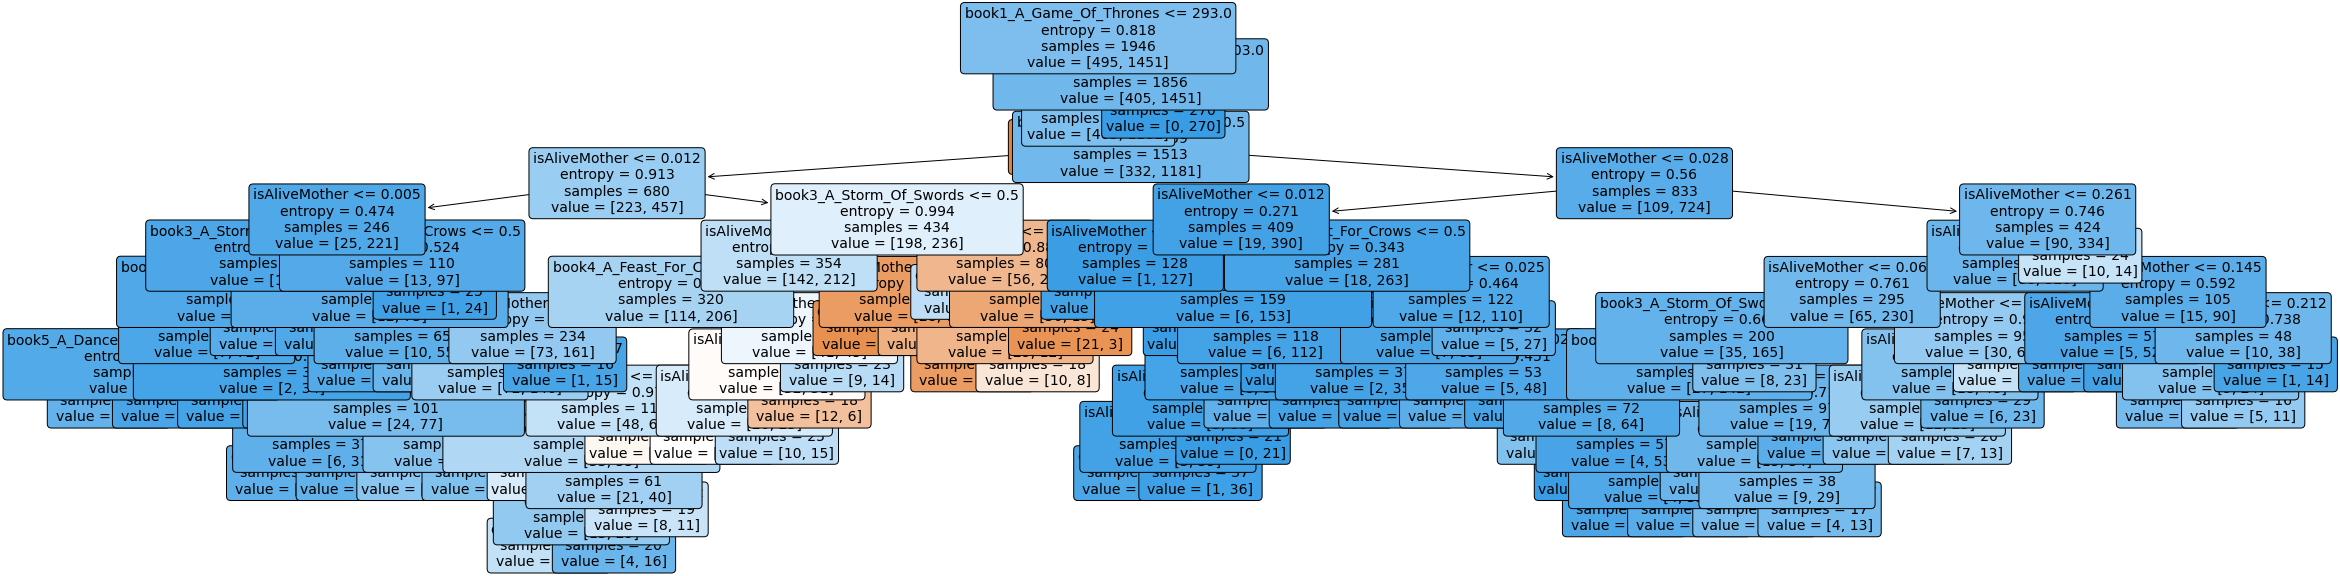

In [84]:
# setting figure size
plt.figure(figsize=(40, 10))


# developing a plotted tree
plot_tree(decision_tree = tree_tuned_fit, 
          feature_names = got_clean.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [85]:
# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


In [86]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [87]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8995
Testing  ACCURACY: 0.8667
AUC Score        : 0.8121


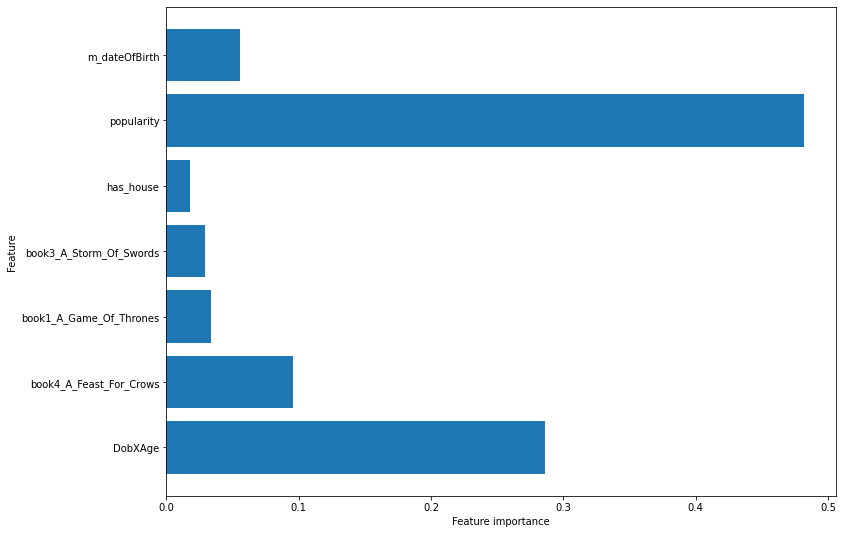

In [88]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [89]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 35
False Positives: 15
False Negatives: 11
True Positives : 134



In [90]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7197,0.7881,0.8462,"(23, 27, 3, 142)"
1,Full Tree,0.8117,0.8995,0.8564,"(36, 14, 14, 131)"
2,Pruned Tree,0.8262,0.8412,0.8974,"(34, 16, 4, 141)"
3,Tuned LR,0.8066,0.8372,0.8974,"(31, 19, 1, 144)"
4,Tuned Tree,0.8631,0.8555,0.9231,"(37, 13, 2, 143)"
5,Random Forest (Full),0.8121,0.8995,0.8667,"(35, 15, 11, 134)"


In [91]:
# FITTING the training data
#rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
#rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
#estimator_range  = np.arange(100, 1100, 250)
#leaf_range       = np.arange(1, 31, 10)
#criterion_range  = ['gini', 'entropy']
#bootstrap_range  = [True, False]
#warm_start_range = [True, False]


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_range,
              #'min_samples_leaf' : leaf_range,
             # 'criterion'        : criterion_range,
              #'bootstrap'        : bootstrap_range,
              #'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
#forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
#forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               #param_distributions = param_grid,
                               #cv         = 3,
                               #n_iter     = 1000,
                               #scoring    = make_scorer(roc_auc_score,
                                            #needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#forest_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", forest_cv.best_params_)
#print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [92]:
# best estimators based on RandomizedSearchCV
#forest_cv.best_estimator_

In [93]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'gini',
                                      min_samples_leaf = 1,
                                      n_estimators     = 350,
                                      warm_start       = True,
                                      bootstrap        = True,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8978
Forest Tuned Testing  ACCURACY: 0.9179
Forest Tuned AUC Score        : 0.8662


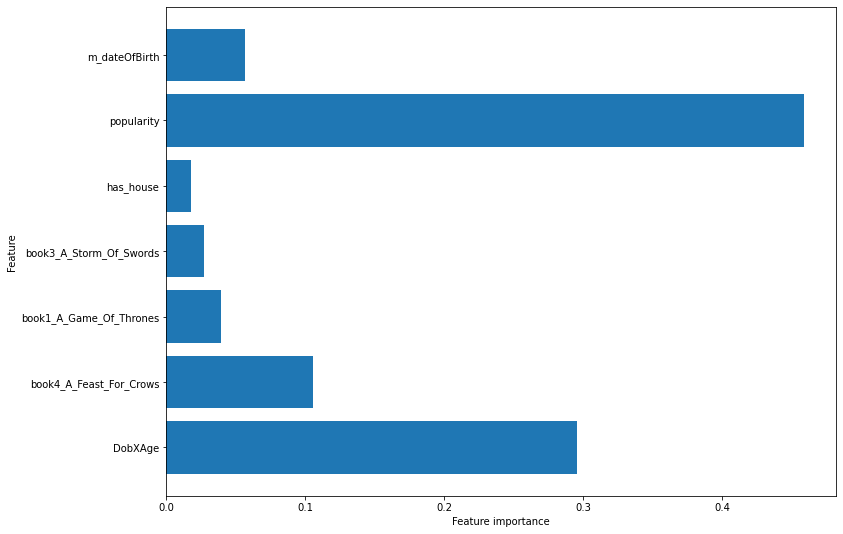

In [94]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [95]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 38
False Positives: 12
False Negatives: 4
True Positives : 141



In [96]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7197,0.7881,0.8462,"(23, 27, 3, 142)"
1,Full Tree,0.8117,0.8995,0.8564,"(36, 14, 14, 131)"
2,Pruned Tree,0.8262,0.8412,0.8974,"(34, 16, 4, 141)"
3,Tuned LR,0.8066,0.8372,0.8974,"(31, 19, 1, 144)"
4,Tuned Tree,0.8631,0.8555,0.9231,"(37, 13, 2, 143)"
5,Random Forest (Full),0.8121,0.8995,0.8667,"(35, 15, 11, 134)"
6,Tuned Random Forest (Full),0.8662,0.8978,0.9179,"(38, 12, 4, 141)"


In [97]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8618
Testing ACCURACY : 0.9128
AUC Score        : 0.8431


In [98]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 35
False Positives: 15
False Negatives: 2
True Positives : 143



In [99]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7197,0.7881,0.8462,"(23, 27, 3, 142)"
1,Full Tree,0.8117,0.8995,0.8564,"(36, 14, 14, 131)"
2,Pruned Tree,0.8262,0.8412,0.8974,"(34, 16, 4, 141)"
3,Tuned LR,0.8066,0.8372,0.8974,"(31, 19, 1, 144)"
4,Tuned Tree,0.8631,0.8555,0.9231,"(37, 13, 2, 143)"
5,Random Forest (Full),0.8121,0.8995,0.8667,"(35, 15, 11, 134)"
6,Tuned Random Forest (Full),0.8662,0.8978,0.9179,"(38, 12, 4, 141)"
7,GBM (Full),0.8431,0.8618,0.9128,"(35, 15, 2, 143)"


In [100]:
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7197,0.7881,0.8462,"(23, 27, 3, 142)"
1,Full Tree,0.8117,0.8995,0.8564,"(36, 14, 14, 131)"
2,Pruned Tree,0.8262,0.8412,0.8974,"(34, 16, 4, 141)"
3,Tuned LR,0.8066,0.8372,0.8974,"(31, 19, 1, 144)"
4,Tuned Tree,0.8631,0.8555,0.9231,"(37, 13, 2, 143)"
5,Random Forest (Full),0.8121,0.8995,0.8667,"(35, 15, 11, 134)"
6,Tuned Random Forest (Full),0.8662,0.8978,0.9179,"(38, 12, 4, 141)"
7,GBM (Full),0.8431,0.8618,0.9128,"(35, 15, 2, 143)"


In [101]:
# declaring a hyperparameter space
#learn_range        = np.arange(0.1, 2.2, 0.5)
#estimator_range    = np.arange(100, 501, 25)
#depth_range        = np.arange(2, 11, 2)
#warm_start_range   = [True, False]

# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_range,
              #'max_depth'     : depth_range,
              #'n_estimators'  : estimator_range,
              #'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
#full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
#full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           #param_distributions = param_grid,
                           #cv                  = 3,
                           #n_iter              = 500,
                           #random_state        = 219,
                           #scoring             = make_scorer(roc_auc_score,
                                                # needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_gbm_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_gbm_cv.best_params_)
#print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [102]:
# checking the best estimator for the model
#full_gbm_cv.best_estimator_

In [103]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 1.1,
                                       max_depth     = 2,
                                       n_estimators  = 350,
                                       warm_start    = False,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.8629
Testing  ACCURACY: 0.9231
AUC Score        : 0.8762


In [104]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 39
False Positives: 11
False Negatives: 4
True Positives : 141



In [105]:
# declaring model performance objects
gbm_tune_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_tune_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_tune_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_tune_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7197,0.7881,0.8462,"(23, 27, 3, 142)"
1,Full Tree,0.8117,0.8995,0.8564,"(36, 14, 14, 131)"
2,Pruned Tree,0.8262,0.8412,0.8974,"(34, 16, 4, 141)"
3,Tuned LR,0.8066,0.8372,0.8974,"(31, 19, 1, 144)"
4,Tuned Tree,0.8631,0.8555,0.9231,"(37, 13, 2, 143)"
5,Random Forest (Full),0.8121,0.8995,0.8667,"(35, 15, 11, 134)"
6,Tuned Random Forest (Full),0.8662,0.8978,0.9179,"(38, 12, 4, 141)"
7,GBM (Full),0.8431,0.8618,0.9128,"(35, 15, 2, 143)"
8,Tuned GBM,0.8762,0.8618,0.9128,"(39, 11, 4, 141)"


#KNN NEIGHBORS

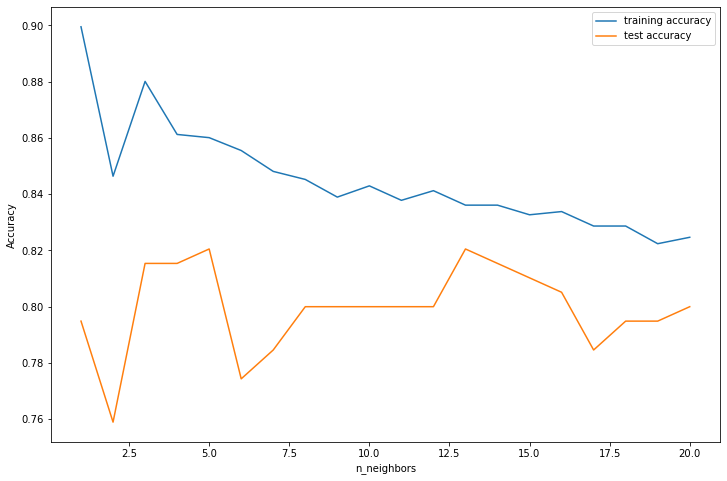

The optimal number of neighbors is: 5


In [106]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = got_data,
                                  y_data        = got_target,
                                  response_type = 'class')

In [107]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.8532
Testing  ACCURACY: 0.8667
AUC Score        : 0.7924


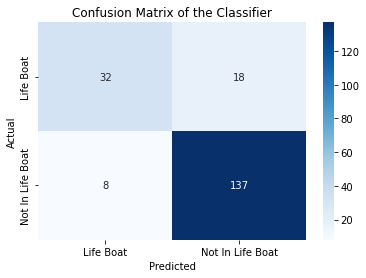

In [108]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Life Boat', 'Not In Life Boat'])

In [109]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 4
True Positives : 141



In [110]:
# declaring model performance objects
knn_train_acc = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_acc  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)
knn_auc       = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)




# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'KNN',
                          'Training Accuracy'  : knn_train_acc,
                          'Testing Accuracy'   : knn_test_acc,
                          'AUC Score'          : knn_auc,
                          'Confusion Matrix'   : (knn_tree_tn, 
                                                    knn_tree_fp, 
                                                    knn_tree_fn, 
                                                    knn_tree_tp )},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7197,0.7881,0.8462,"(23, 27, 3, 142)"
1,Full Tree,0.8117,0.8995,0.8564,"(36, 14, 14, 131)"
2,Pruned Tree,0.8262,0.8412,0.8974,"(34, 16, 4, 141)"
3,Tuned LR,0.8066,0.8372,0.8974,"(31, 19, 1, 144)"
4,Tuned Tree,0.8631,0.8555,0.9231,"(37, 13, 2, 143)"
5,Random Forest (Full),0.8121,0.8995,0.8667,"(35, 15, 11, 134)"
6,Tuned Random Forest (Full),0.8662,0.8978,0.9179,"(38, 12, 4, 141)"
7,GBM (Full),0.8431,0.8618,0.9128,"(35, 15, 2, 143)"
8,Tuned GBM,0.8762,0.8618,0.9128,"(39, 11, 4, 141)"
9,KNN,0.7924,0.8532,0.8667,"(32, 18, 8, 137)"


In [111]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
8,Tuned GBM,0.8762,0.8618,0.9128,"(39, 11, 4, 141)"
6,Tuned Random Forest (Full),0.8662,0.8978,0.9179,"(38, 12, 4, 141)"
4,Tuned Tree,0.8631,0.8555,0.9231,"(37, 13, 2, 143)"
7,GBM (Full),0.8431,0.8618,0.9128,"(35, 15, 2, 143)"
2,Pruned Tree,0.8262,0.8412,0.8974,"(34, 16, 4, 141)"
5,Random Forest (Full),0.8121,0.8995,0.8667,"(35, 15, 11, 134)"
1,Full Tree,0.8117,0.8995,0.8564,"(36, 14, 14, 131)"
3,Tuned LR,0.8066,0.8372,0.8974,"(31, 19, 1, 144)"
9,KNN,0.7924,0.8532,0.8667,"(32, 18, 8, 137)"
0,Logistic,0.7197,0.7881,0.8462,"(23, 27, 3, 142)"


In [124]:
# comparing results
print(f"""
Model         AUC Score        TN, FP, FN, TP
-----         ---------        --------------
Logistic        {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree       {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree     {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
Tuned LR        {lr_tuned_auc}          {lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
Tuned Tree      {tree_tuned_auc}          {tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp}
Random Forest   {rf_auc}                 {rf_tn, rf_fp, rf_fn, rf_tp}
Tuned Random Forest  {tuned_rf_auc}           {tuned_rf_tn, tuned_rf_fp, tuned_rf_fn,tuned_rf_tp}
GBM             {gbm_auc}                  {gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp}
-----------------
(Best)Tuned GBM {gbm_tune_auc }             {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}
-------------------
KNN             {knn_auc_score}              {knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp}               
""") 


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree','Tuned LR', 
                       'Tuned Tree','Random Forest','Tuned Random Forest',
                       'GBM','Tuned GBM','KNN'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score,
                  lr_tuned_auc,tree_tuned_auc,rf_auc,tuned_rf_auc,gbm_auc,gbm_tune_auc,
                  knn_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                           (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                           (rf_tn, rf_fp, rf_fn, rf_tp),
                           (tuned_rf_tn, tuned_rf_fp, tuned_rf_fn,tuned_rf_tp),
                           (gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp),
                           (gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp),
                           (knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp)]}


Model         AUC Score        TN, FP, FN, TP
-----         ---------        --------------
Logistic        0.7197         (23, 27, 3, 142)
Full Tree       0.8117         (36, 14, 14, 131)
Pruned Tree     0.8262         (34, 16, 4, 141)
Tuned LR        0.8066          (31, 19, 1, 144)
Tuned Tree      0.8631          (37, 13, 2, 143)
Random Forest   0.8121                 (35, 15, 11, 134)
Tuned Random Forest  0.8662           (38, 12, 4, 141)
GBM             0.8431                  (35, 15, 2, 143)
-----------------
(Best)Tuned GBM 0.8762             (39, 11, 4, 141)
-------------------
KNN             0.7924              (32, 18, 8, 137)               

